Modelo simples sobre empréstimo bancario utilizando técnicas básicas de análise de dados, machine learning e tuning de parametros 

In [ ]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from category_encoders.one_hot import OneHotEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Alterar de acordo com o caminho do drive
drivepath='/content/drive/MyDrive/dataset/Loan_Data.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset/Loan_Data.csv')

In [ ]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [ ]:
df.rename(
    columns={'Gender':'Genero', 
             'Married':'Casado', 
             'Dependents':'Dependentes', 
             'Self_Employed':'Autonomo', 
             'ApplicantIncome':'Renda_Mensal_Cliente',
             'CoapplicantIncome':'Renda_Mensal_Conjuge',
             'LoanAmount':'Valor_Emprestimo',
             'Loan_Amount_Term':'Prazo_Emprestimo',
             'Credit_History':'Credito_Atende_Diretrizes', 
             'Loan_Status':'Status_Emprestimo'          
             },
    inplace=True      
)
df.head(2)

,Loan_ID,Genero,Casado,Dependentes,Education,Autonomo,Renda_Mensal_Cliente,Renda_Mensal_Conjuge,Valor_Emprestimo,Prazo_Emprestimo,Credito_Atende_Diretrizes,Property_Area,Status_Emprestimo
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [ ]:
df.describe()

,Renda_Mensal_Cliente,Renda_Mensal_Conjuge,Valor_Emprestimo,Prazo_Emprestimo,Credito_Atende_Diretrizes
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan_ID                    614 non-null    object 
 1   Genero                     601 non-null    object 
 2   Casado                     611 non-null    object 
 3   Dependentes                599 non-null    object 
 4   Education                  614 non-null    object 
 5   Autonomo                   582 non-null    object 
 6   Renda_Mensal_Cliente       614 non-null    int64  
 7   Renda_Mensal_Conjuge       614 non-null    float64
 8   Valor_Emprestimo           592 non-null    float64
 9   Prazo_Emprestimo           600 non-null    float64
 10  Credito_Atende_Diretrizes  564 non-null    float64
 11  Property_Area              614 non-null    object 
 12  Status_Emprestimo          614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 6

In [ ]:
df.nunique()

Loan_ID                      614
Genero                         2
Casado                         2
Dependentes                    4
Education                      2
Autonomo                       2
Renda_Mensal_Cliente         505
Renda_Mensal_Conjuge         287
Valor_Emprestimo             203
Prazo_Emprestimo              10
Credito_Atende_Diretrizes      2
Property_Area                  3
Status_Emprestimo              2
dtype: int64

In [ ]:
#Checando a porcentagem de dados faltantes no dataset
percent_missing = df.isnull().sum() * 100 / len(df) 
missing_value_df = pd.DataFrame({'column_name': df.columns, 
                                 'percent_missing': percent_missing})
missing_value_df.sort_values(['percent_missing'], ascending=False)

,column_name,percent_missing
Credito_Atende_Diretrizes,Credito_Atende_Diretrizes,8.143322
Autonomo,Autonomo,5.211726
Valor_Emprestimo,Valor_Emprestimo,3.583062
Dependentes,Dependentes,2.442997
Prazo_Emprestimo,Prazo_Emprestimo,2.280130
Genero,Genero,2.117264
Casado,Casado,0.488599
Loan_ID,Loan_ID,0.000000
Education,Education,0.000000
Renda_Mensal_Cliente,Renda_Mensal_Cliente,0.000000


In [ ]:
# Substituindo os dados faltantes pelos valores que estão a frente da posição vazia
df = df.fillna(method='ffill')

In [ ]:
# Checando se ainda há algum dado faltante
percent_missing = df.isnull().sum() * 100 / len(df) 
missing_value_df = pd.DataFrame({'column_name': df.columns, 
                                 'percent_missing': percent_missing})
missing_value_df.sort_values(['percent_missing'], ascending=False)

,column_name,percent_missing
Valor_Emprestimo,Valor_Emprestimo,0.162866
Loan_ID,Loan_ID,0.000000
Genero,Genero,0.000000
Casado,Casado,0.000000
Dependentes,Dependentes,0.000000
Education,Education,0.000000
Autonomo,Autonomo,0.000000
Renda_Mensal_Cliente,Renda_Mensal_Cliente,0.000000
Renda_Mensal_Conjuge,Renda_Mensal_Conjuge,0.000000
Prazo_Emprestimo,Prazo_Emprestimo,0.000000


In [ ]:
# Removendo os poucos dados que continuaram faltando
df = df.dropna()

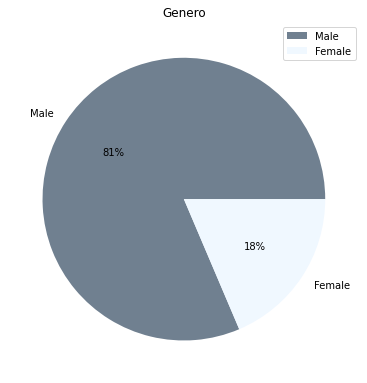

In [ ]:
plt.subplots(figsize=(6.6, 6.5))
x = df['Genero'].value_counts()
plt.pie(x,
        labels = x.index,
        colors=['slategray', 'aliceblue', 'crimson'],
        autopct='%1.i%%'
        )
plt.title('Genero')
plt.legend()
plt.show()

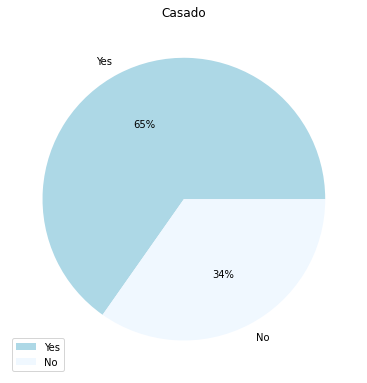

In [ ]:
plt.subplots(figsize=(6.6, 6.5))
x = df['Casado'].value_counts()
plt.pie(x,
        labels = x.index,
        colors=['lightblue', 'aliceblue'],
        autopct='%1.i%%'
        )
plt.title('Casado')
plt.legend()
plt.show()

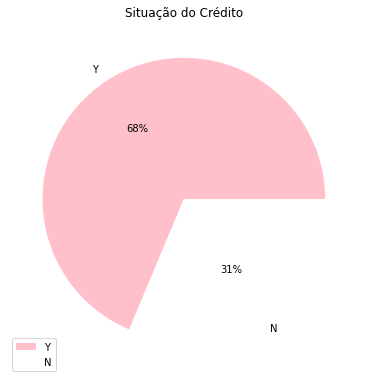

In [ ]:
plt.subplots(figsize=(6.6, 6.5))
x = df['Status_Emprestimo'].value_counts()
plt.pie(x,
        labels = x.index,
        colors=['pink', 'white'],
        autopct='%1.i%%'
        )
plt.title('Situação do Crédito')
plt.legend()
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0.5, ''), Text(0.5, 1.0, 'Quantidade de Dependentes')]

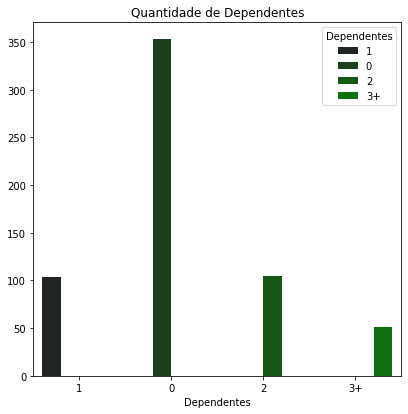

In [ ]:
plt.subplots(figsize=(6.6, 6.5))
x = df['Dependentes']
grafic = sns.countplot(x, 
              hue=x,
              palette='dark:green')
grafic.set(ylabel = '', title ='Quantidade de Dependentes')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0.5, ''), Text(0.5, 1.0, 'Prazo dos emprestimos')]

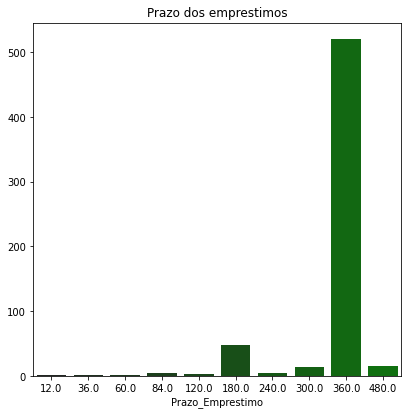

In [ ]:
plt.subplots(figsize=(6.6, 6.5))
x = df['Prazo_Emprestimo']
grafic = sns.countplot(x, 
              
              palette='dark:green')
grafic.set(ylabel = '', title ='Prazo dos emprestimos')

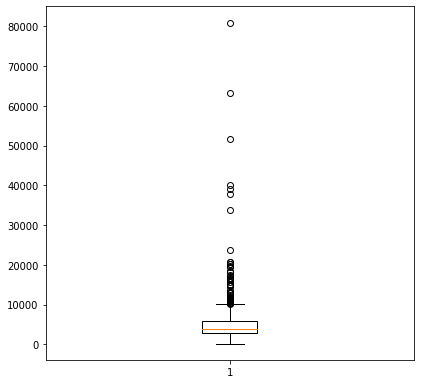

In [ ]:
plt.subplots(figsize=(6.6, 6.5))
plt.boxplot(df['Renda_Mensal_Cliente'])
plt.show()

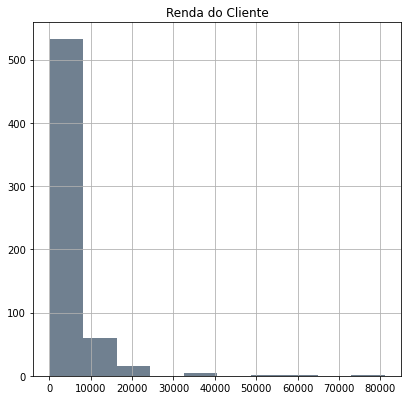

In [ ]:
plt.subplots(figsize = (6.6, 6.5))
df['Renda_Mensal_Cliente'].hist(color='slategray')
plt.xlabel('')
plt.ylabel('')
plt.title('Renda do Cliente')
plt.show()

[Text(0.5, 0, ''), Text(0.5, 1.0, 'Renda mensal do cliente')]

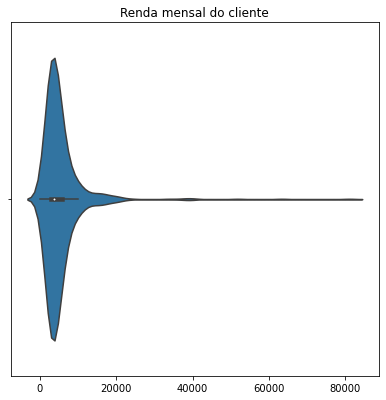

In [ ]:
plt.subplots(figsize = (6.6, 6.5))
grafic = sns.violinplot(x=df['Renda_Mensal_Cliente'])
grafic.set(xlabel='', title='Renda mensal do cliente')

In [ ]:
obj = df.select_dtypes(include='object').columns
print(obj)

Index(['Loan_ID', 'Genero', 'Casado', 'Dependentes', 'Education', 'Autonomo',
       'Property_Area', 'Status_Emprestimo'],
      dtype='object')


In [ ]:
# Tratando algumas variaveis categoricas com LabelEncoder afim de transforma-las em numericas
for variaveis_object in ['Genero', 'Casado', 'Education', 'Autonomo', 'Status_Emprestimo', 'Dependentes']:
  df[variaveis_object] = LabelEncoder().fit_transform(df[variaveis_object])

In [ ]:
# Utilizando OneHotEncoder afim de manter a integridade das variaveis evitando 
# que o modelo possa interpreta-las como ordinais caso fosse usado o LabelEncoder
ohe = OneHotEncoder(cols=['Property_Area'], use_cat_names=True)
df = ohe.fit_transform(df)

In [ ]:
df['Renda_Mensal_Total'] = df['Renda_Mensal_Cliente'] + df['Renda_Mensal_Conjuge']

In [ ]:
df = df.drop(['Loan_ID'], axis=1)

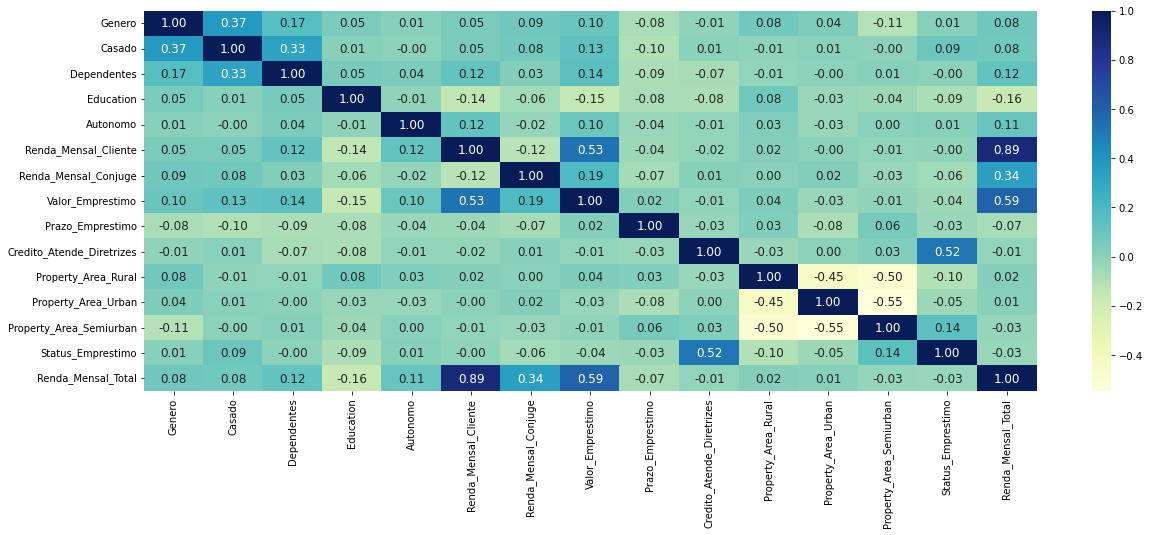

In [ ]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(20,7))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True, cmap='YlGnBu', annot_kws={'size':12}, fmt='.2f'
            )

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 613 entries, 1 to 613
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Genero                     613 non-null    int64  
 1   Casado                     613 non-null    int64  
 2   Dependentes                613 non-null    int64  
 3   Education                  613 non-null    int64  
 4   Autonomo                   613 non-null    int64  
 5   Renda_Mensal_Cliente       613 non-null    int64  
 6   Renda_Mensal_Conjuge       613 non-null    float64
 7   Valor_Emprestimo           613 non-null    float64
 8   Prazo_Emprestimo           613 non-null    float64
 9   Credito_Atende_Diretrizes  613 non-null    float64
 10  Property_Area_Rural        613 non-null    int64  
 11  Property_Area_Urban        613 non-null    int64  
 12  Property_Area_Semiurban    613 non-null    int64  
 13  Status_Emprestimo          613 non-null    int64  

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(['Status_Emprestimo'], axis=1)
y = df['Status_Emprestimo']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.13)

In [ ]:
rf_model = RandomForestClassifier(random_state=8)

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=8)

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)

(0.85, 0.9473684210526315, 0.9)

In [ ]:
def metrics(y_test, y_pred):
    acuracia = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return acuracia, recall, f1

In [ ]:
# Uma melhor maneira de apresentar as métricas
metrics(y_test, y_pred)

(0.85, 0.9473684210526315, 0.9)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Iniciando o Tuning de Parametros com GridSearch
parametros = {
    'min_samples_leaf':(1, 4),
    'min_samples_split':(2, 10), 
    'n_estimators':(100, 300, 500, 700)
}

In [ ]:
model_grid = GridSearchCV(rf_model, parametros)
model_grid.fit(X_train, y_train)
GridSearchCV(estimator=RandomForestClassifier(random_state=8),
             param_grid=parametros,
             n_jobs=-1
             )

GridSearchCV(estimator=RandomForestClassifier(random_state=8), n_jobs=-1,
             param_grid={'min_samples_leaf': (1, 4),
                         'min_samples_split': (2, 10),
                         'n_estimators': (100, 300, 500, 700)})

In [ ]:
model_grid.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}

In [ ]:
rf = model_grid.best_estimator_

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
metrics(y_test, y_pred)

(0.875, 0.9649122807017544, 0.9166666666666667)